<a href="https://colab.research.google.com/github/kanthee23/AI-Agent/blob/main/Salary_prediction_K_nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploded = files.upload()

Saving salary.csv to salary.csv


**Import the datafrom file and check Shape and details**

In [3]:
df = pd.read_csv('salary.csv')
print(df.shape)

(32561, 5)


In [4]:
print(df.head())

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


**Seperate the X, Y**

In [5]:
X = df.iloc[:, :-1].values
print(X)

[[90  9  0 40]
 [82  9  0 18]
 [66 10  0 40]
 ...
 [40  9  0 40]
 [58  9  0 40]
 [22  9  0 20]]


Apply the mapping to Y, if >50K then map to 1, elase 0

In [6]:
mapping = {
    '<=50K' : 0,
    '>50K' : 1
}
Y = df['income'].map(mapping).values
print(Y)

[0 0 0 ... 1 0 0]


**Split the train and test data**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

**Apply the Feature scaling**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-0.03932513 -1.57958651 -0.14722748  3.99956949]
 [-0.99574562  1.13107604 -0.14722748 -0.04419326]
 [ 1.79994504 -0.03063648 -0.14722748  0.76455929]
 ...
 [ 1.21137858 -0.41787399 -0.14722748 -0.04419326]
 [ 0.18138729 -0.03063648 -0.14722748  0.76455929]
 [-1.21645804 -0.41787399 -0.14722748  0.76455929]]


**Finding the Best K value**

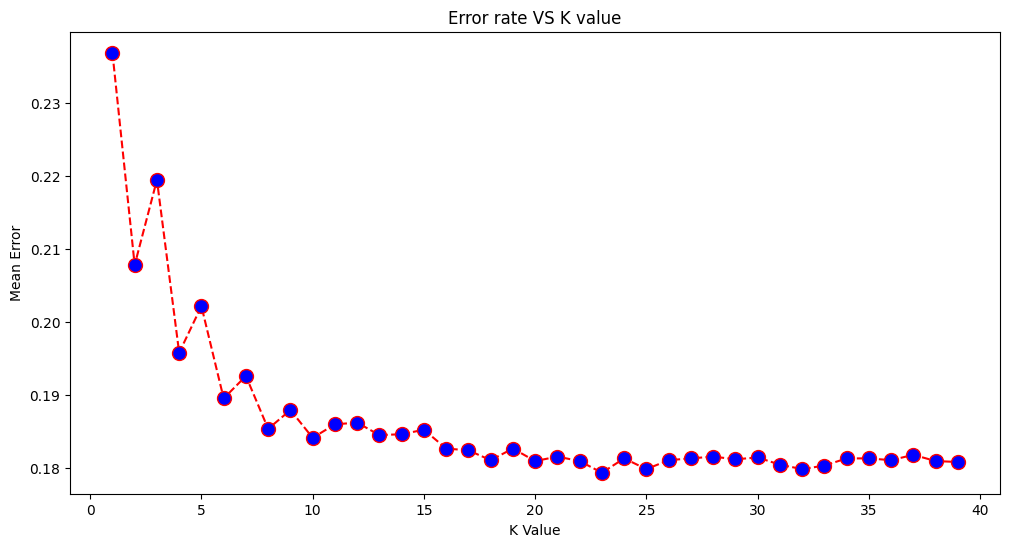

In [13]:
from matplotlib.lines import lineStyles
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K value between 1 and 40

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  predict_i = model.predict(X_test)
  error.append(np.mean(predict_i != y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker = 'o',
         mfc = 'blue', ms = 10)
plt.title('Error rate VS K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [28]:
# Select the K value as 8

model = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [29]:
from sklearn.metrics import accuracy_score, mean_absolute_error,confusion_matrix

y_predict = model.predict(X_test)
print(f"Predict Acuracy Score :{accuracy_score(y_test, y_predict)}")
print(f"Mean absolute error :{mean_absolute_error(y_test, y_predict)}")
print("Confution matrix:")
print(confusion_matrix(y_test, y_predict))

Predict Acuracy Score :0.814641935880113
Mean absolute error :0.18535806411988698
Confution matrix:
[[5870  327]
 [1182  762]]


**Predict to the New coustomer Salary**

In [34]:
age = input("Enter the Age :")
edu = input("Enter the Education :")
cg = input("Enter the capital : ")
wh = input("Enter the working hours per week :")
new_cust = [[age, edu, cg, wh]]
new_cust = sc.transform(new_cust)
result = model.predict(new_cust)

if result == 1:
  print("Customer will get more than 50K.")
else:
  print("Customer will not get more than 50K!.")




Enter the Age :45
Enter the Education :15
Enter the capital : 1
Enter the working hours per week :45
Customer will get more than 50K.
